In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
RAW_PATH = "../data/raw/air_quality_raw.csv"

if not os.path.exists(RAW_PATH):
    raise FileNotFoundError(f" File not found: {RAW_PATH}")

df = pd.read_csv(RAW_PATH)
print(" Data Loaded Successfully!")
print(f"Shape: {df.shape}")
df.head()

 Data Loaded Successfully!
Shape: (29531, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [14]:
print(" Dataset Info:")
df.info()

print("\n Summary Statistics:")
display(df.describe())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB

 Summary Statistics:


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [15]:
missing = df.isnull().sum().sort_values(ascending=False)
print("❗ Missing Values per Column:")
print(missing)

❗ Missing Values per Column:
Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
Date              0
City              0
dtype: int64


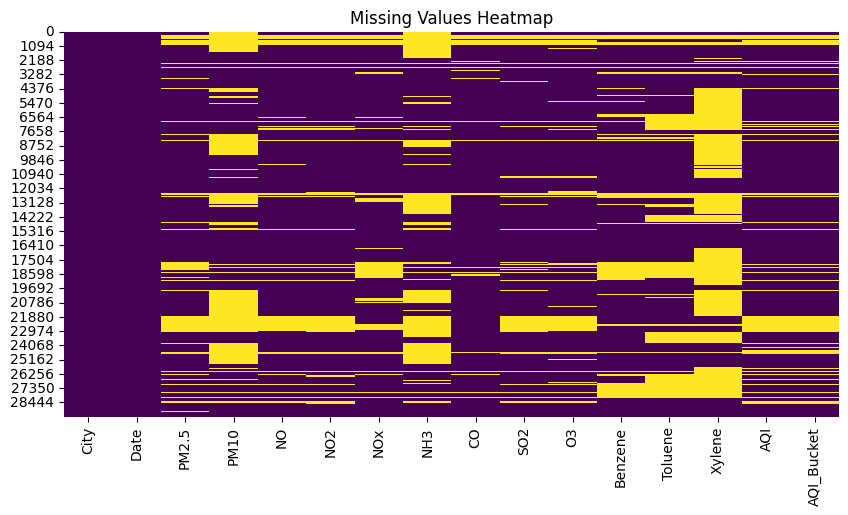

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
print(" Column Names:", df.columns.tolist())

if 'City' in df.columns or 'city' in df.columns:
    city_col = 'City' if 'City' in df.columns else 'city'
    print(f"\n Number of Unique Cities: {df[city_col].nunique()}")
    print("Cities:", df[city_col].unique()[:10])


 Column Names: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

 Number of Unique Cities: 26
Cities: ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore']


In [18]:
date_col = None
for col in df.columns:
    if 'date' in col.lower():
        date_col = col
        break

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    print(f" Converted '{date_col}' to datetime.")
    print(f" Date Range: {df[date_col].min()} → {df[date_col].max()}")
else:
    print("⚠️ No date column found in dataset.")


 Converted 'Date' to datetime.
 Date Range: 2015-01-01 00:00:00 → 2020-07-01 00:00:00


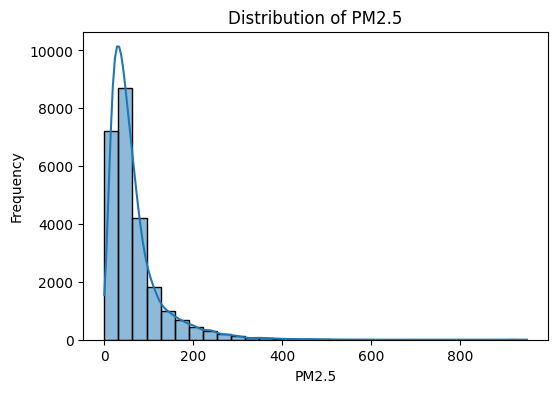

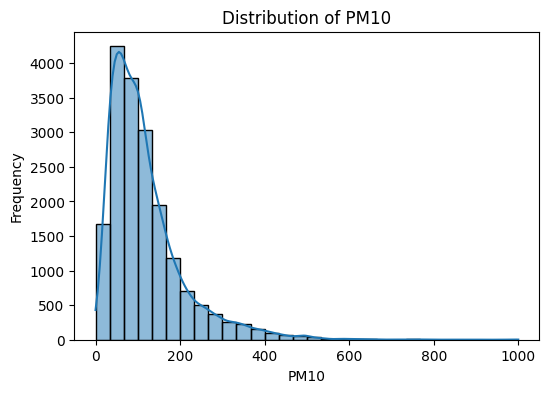

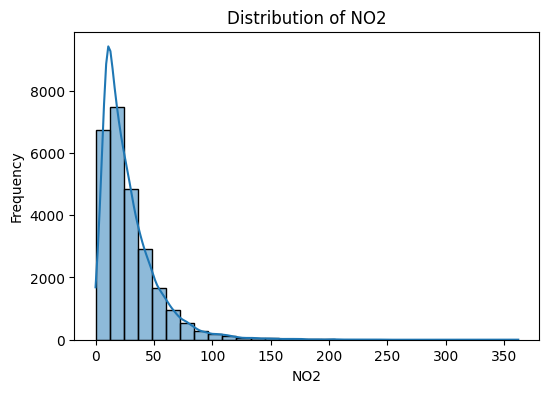

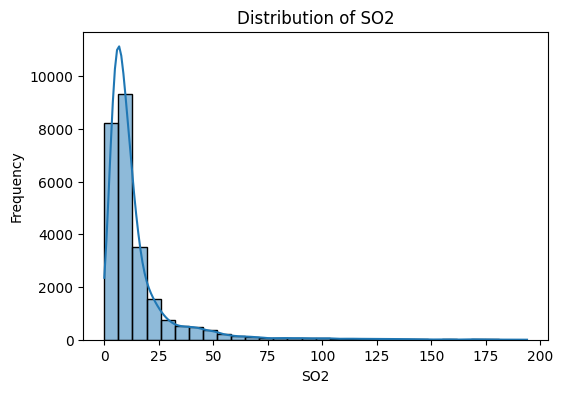

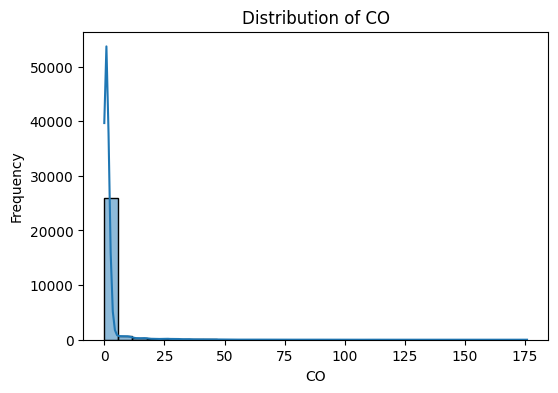

In [19]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

for p in pollutants:
    if p in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[p], bins=30, kde=True)
        plt.title(f"Distribution of {p}")
        plt.xlabel(p)
        plt.ylabel("Frequency")
        plt.show()


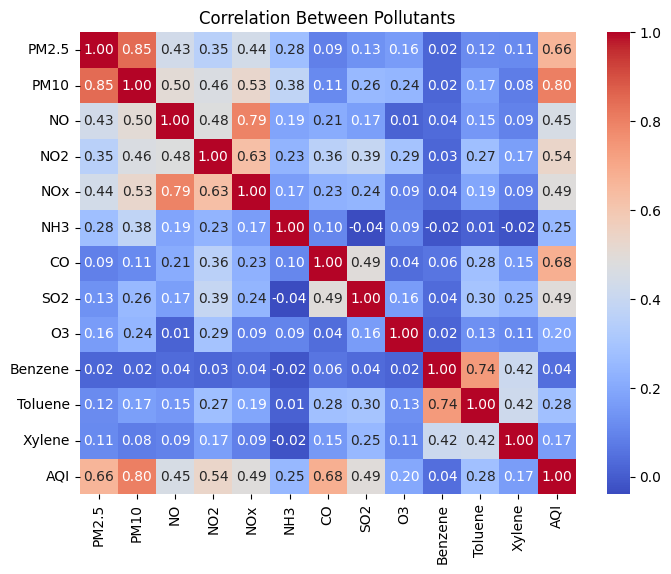

In [20]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Pollutants")
plt.show()


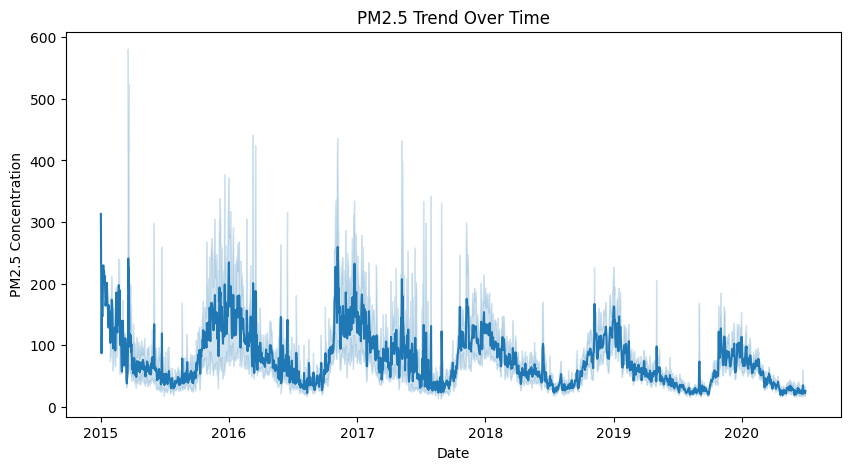

In [21]:
if date_col and 'PM2.5' in df.columns:
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df.sort_values(by=date_col), x=date_col, y='PM2.5')
    plt.title("PM2.5 Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("PM2.5 Concentration")
    plt.show()


In [22]:
print(" Exploration Complete!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("Next step ➜ 02_data_cleaning.ipynb")



 Exploration Complete!
Rows: 29531, Columns: 16
Next step ➜ 02_data_cleaning.ipynb
